# Data Preprocessing

## Library Imports

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.model_selection import KFold

## Data Imports

In [47]:
android=pd.read_csv('Android_Malware.csv')

## EDA (Exploratory Data Analysis)

In [49]:
android.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,172.217.6.202-10.42.0.211-443-50004-6,10.42.0.211,50004,172.217.6.202,443.0,6.0,13/06/2017 11:52:39,37027,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
1,1,172.217.6.202-10.42.0.211-443-35455-6,10.42.0.211,35455,172.217.6.202,443.0,6.0,13/06/2017 11:52:39,36653,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
2,2,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,13/06/2017 11:52:42,534099,8,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
3,3,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,13/06/2017 11:52:43,9309,3,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
4,4,131.253.61.68-10.42.0.211-443-51776-6,10.42.0.211,51776,131.253.61.68,443.0,6.0,13/06/2017 11:52:42,19890496,8,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware


In [50]:
android.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355630 entries, 0 to 355629
Data columns (total 86 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    355630 non-null  int64  
 1   Flow ID                       355629 non-null  object 
 2    Source IP                    355630 non-null  object 
 3    Source Port                  355630 non-null  int64  
 4    Destination IP               355630 non-null  object 
 5    Destination Port             355630 non-null  float64
 6    Protocol                     355630 non-null  float64
 7    Timestamp                    355630 non-null  object 
 8    Flow Duration                355630 non-null  int64  
 9    Total Fwd Packets            355630 non-null  int64  
 10   Total Backward Packets       355630 non-null  int64  
 11  Total Length of Fwd Packets   355630 non-null  float64
 12   Total Length of Bwd Packets  355630 non-nul

In [51]:
android.describe()

,Unnamed: 0,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,355630.000000,3.556300e+05,3.556300e+05,355630.000000,3.556300e+05,355630.000000,3.556300e+05,3.556300e+05,3.556300e+05,3.556300e+05,...,355626.000000,3.556260e+05,3.556260e+05,3.556260e+05,3.556260e+05,3.556260e+05,3.556260e+05,3.556260e+05,3.556260e+05,3.556260e+05
mean,1945.719231,3.914129e+04,5.202541e+03,9.765190,1.092975e+07,7.433718,1.420368e+01,6.796042e+02,1.129508e+04,2.150150e+02,...,1.524405,-2.831850e+04,1.628143e+05,2.195225e+04,1.851564e+05,1.456534e+05,4.025724e+06,3.182527e+05,4.304876e+06,3.779037e+06
std,1840.477646,1.794632e+04,1.452135e+04,750.541237,2.180861e+07,81.015658,2.220247e+03,1.942007e+04,2.763871e+05,1.834912e+03,...,14.938322,5.543875e+06,8.817765e+05,2.860244e+05,1.019477e+06,8.423659e+05,1.441518e+07,2.882901e+06,1.514008e+07,1.407042e+07
min,0.000000,0.000000e+00,0.000000e+00,0.000000,-1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,-1.395063e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,640.000000,3.455900e+04,8.000000e+01,6.000000,4.888600e+04,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1568.000000,4.322600e+04,4.430000e+02,6.000000,5.602255e+05,2.000000,1.000000e+00,3.100000e+01,2.600000e+01,3.100000e+01,...,0.000000,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2718.000000,5.228300e+04,4.430000e+02,6.000000,1.076907e+07,5.000000,4.000000e+00,4.300000e+02,3.010000e+02,3.430000e+02,...,1.000000,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,14157.000000,1.045267e+06,1.328159e+06,442719.666667,1.199999e+08,27165.000000,1.319105e+06,9.043781e+06,8.050972e+07,1.072354e+06,...,6335.000000,1.705248e+08,9.718488e+07,4.020815e+07,9.718488e+07,9.718488e+07,1.199514e+08,7.737303e+07,1.199514e+08,1.199514e+08


In [52]:
  android.shape

(355630, 86)

In [75]:
android.sample(frac=1).reset_index(drop=True)

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,123,172.217.9.234-10.42.0.151-443-60187-6,10.42.0.151,60187,172.217.9.234,443.0,6.0,22/06/2017 04:38:21,1063010,18,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Scareware
1,1049,10.42.0.151-31.13.80.52-48318-443-6,10.42.0.151,48318,31.13.80.52,443.0,6.0,30/06/2017 01:11:21,45198605,10,...,32.0,167283.0,0.0,167283.0,167283.0,45031322.0,0.0,45031322.0,45031322.0,Android_Scareware
2,298,10.42.0.211-95.213.11.133-40694-443-6,95.213.11.133,443,10.42.0.211,40694.0,6.0,16/06/2017 09:11:36,6528,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,1524,10.42.0.151-10.42.0.1-38574-53-17,10.42.0.151,38574,10.42.0.1,53.0,17.0,30/06/2017 12:21:29,206856,1,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Scareware
4,2265,10.42.0.211-10.42.0.1-31183-53-17,10.42.0.211,31183,10.42.0.1,53.0,17.0,13/06/2017 04:31:17,1530,1,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355625,2404,10.42.0.151-10.42.0.1-58509-53-17,10.42.0.151,58509,10.42.0.1,53.0,17.0,22/06/2017 04:06:50,61263,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Scareware
355626,1382,10.42.0.151-47.93.76.169-48717-80-6,10.42.0.151,48717,47.93.76.169,80.0,6.0,14/06/2017 06:54:14,515456,3,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
355627,1169,172.217.1.163-10.42.0.151-80-32805-6,10.42.0.151,32805,172.217.1.163,80.0,6.0,14/06/2017 08:46:02,879897,2,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
355628,2428,10.42.0.1-10.42.0.42-53-63301-17,10.42.0.42,63301,10.42.0.1,53.0,17.0,28/06/2017 12:14:14,48450,1,...,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_SMS_Malware


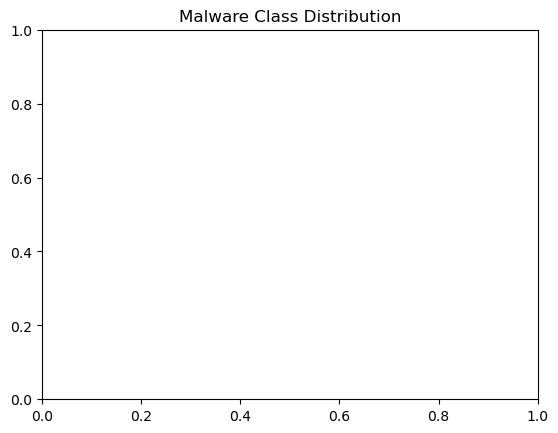

In [77]:
sns.countplot(X='malware', android=android)
plt.title('Malware Class Distribution')
plt.show()

## Handling Missing Value

## Feature Engineering

## Handling Outlier

## Data Visualization

# Model Building

## Train Test Split 

## Model Initalization

## Model Training

## Hyper Parameter Tuining

# Evaluation and Result

# Error

# Research